/home/rithvik/research/analysenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Validation loss:
-1.753237247467041


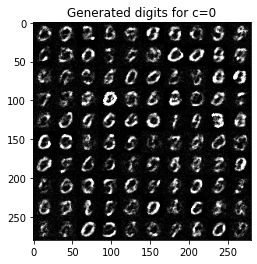

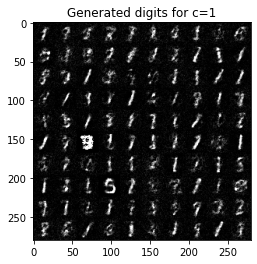

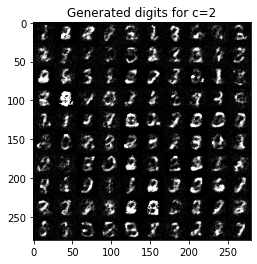

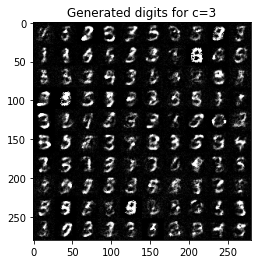

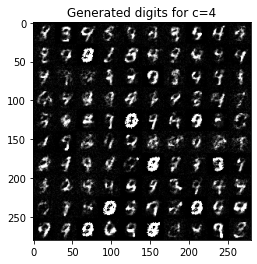

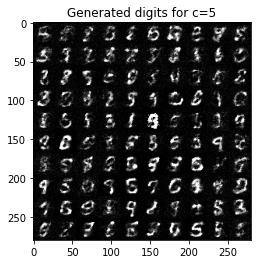

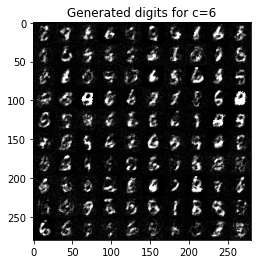

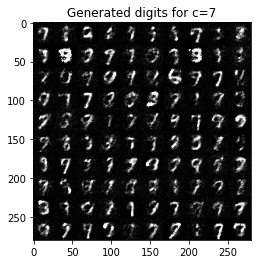

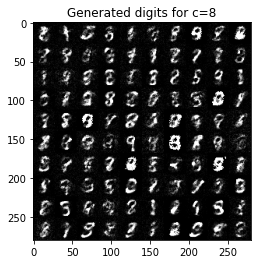

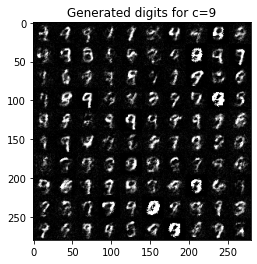

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import model
import data

cinn = model.MNIST_cINN(0)
cinn.cuda()
state_dict = {k:v for k,v in torch.load('output/mnist_cinn.pt').items() if 'tmp_var' not in k}
cinn.load_state_dict(state_dict)

cinn.eval()

def show_samples(label):
    '''produces and shows cINN samples for a given label (0-9)'''

    N_samples = 100
    l = torch.cuda.LongTensor(N_samples)
    l[:] = label

    z = 1.0 * torch.randn(N_samples, model.ndim_total).cuda()

    with torch.no_grad():
        samples = cinn.reverse_sample(z, l)[0].cpu().numpy()
        samples = data.unnormalize(samples)

    full_image = np.zeros((28*10, 28*10))

    for k in range(N_samples):
        i, j = k // 10, k % 10
        full_image[28 * i : 28 * (i + 1),
                   28 * j : 28 * (j + 1)] = samples[k, 0]

    full_image = np.clip(full_image, 0, 1)
    plt.figure()
    plt.title(F'Generated digits for c={label}')
    plt.imshow(full_image, vmin=0, vmax=1, cmap='gray')

def val_loss():
    '''prints the final validiation loss of the model'''

    with torch.no_grad():
        z, log_j = cinn(data.val_x, data.val_l)
        nll_val = torch.mean(z**2) / 2 - torch.mean(log_j) / model.ndim_total

    print('Validation loss:')
    print(nll_val.item())

val_loss()

for i in range(10):
    show_samples(i)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
original = [-1.663816,-1.742463,-1.792249,-1.825357,-1.856691,-1.866785,-1.879715,-1.893596,-1.903939,-1.911881,-1.917735,-1.933122,-1.937500,-1.940302,-1.948720,-1.953072,-1.956967,-1.962896,-1.964434,-1.972149,-2.011838,-2.015813,-2.017173,-2.021856,-2.021558,-2.025078,-2.025074,-2.028608,-2.028533,-2.028005,-2.029448,-2.031189,-2.032135,-2.031584,-2.034834,-2.034557,-2.035502,-2.036017,-2.035151,-2.037859,-2.042915,-2.043082,-2.043081,-2.043311,-2.042540,-2.043555,-2.043292,-2.043417,-2.043408,-2.044003,-2.043587,-2.043589,-2.044455,-2.043969,-2.044116,-2.043680,-2.043872,-2.043598,-2.044343,-2.044985,-2.044600,-2.044558,-2.044577,-2.044905,-2.045432,-2.045206,-2.044957,-2.045003,-2.044675,-2.044055,-2.044853,-2.046279,-2.045264,-2.044860,-2.045389,-2.045036,-2.045534,-2.046212,-2.045572,-2.045639,-2.045693,-2.045878,-2.045049,-2.045866,-2.046414,-2.045980]